In [1]:
#import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#import dataset 
df=pd.read_csv("C:/Users/SAI SAATHWIK DUSSA/Downloads/time_series_Microsoft_Stock.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
df['Date']=pd.to_datetime(df.Date)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [9]:
df.shape

(1511, 5)

<AxesSubplot:xlabel='Date'>

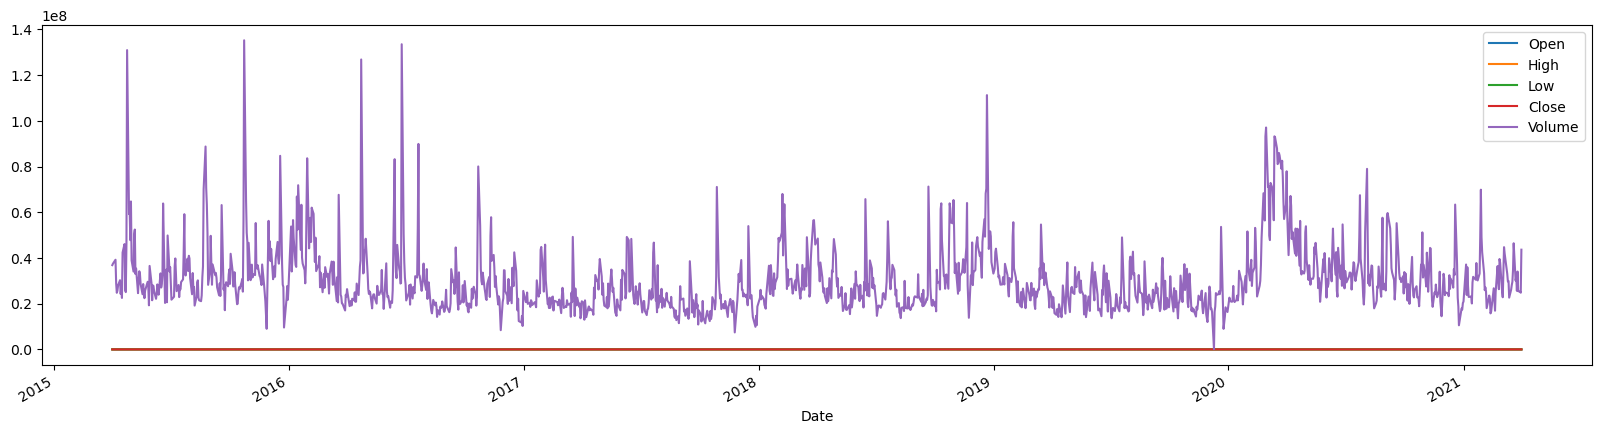

In [10]:
df.plot(figsize=(20,5))

# STATIONARY TEST

In [11]:
from statsmodels.tsa.stattools import adfuller
def adf_test (series):
    result=adfuller(series)
    print ('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("Stationary")
    else:
        print("Not stationary")
adf_test(df['High'])

p-value:0.997766061521655
Not stationary


# differencing

In [12]:
df['High'],df['High'].shift(1)

(Date
 2015-04-01 16:00:00     40.76
 2015-04-02 16:00:00     40.74
 2015-04-06 16:00:00     41.78
 2015-04-07 16:00:00     41.91
 2015-04-08 16:00:00     41.69
                         ...  
 2021-03-25 16:00:00    236.94
 2021-03-26 16:00:00    236.71
 2021-03-29 16:00:00    236.80
 2021-03-30 16:00:00    233.85
 2021-03-31 16:00:00    239.10
 Name: High, Length: 1511, dtype: float64,
 Date
 2015-04-01 16:00:00       NaN
 2015-04-02 16:00:00     40.76
 2015-04-06 16:00:00     40.74
 2015-04-07 16:00:00     41.78
 2015-04-08 16:00:00     41.91
                         ...  
 2021-03-25 16:00:00    238.00
 2021-03-26 16:00:00    236.94
 2021-03-29 16:00:00    236.71
 2021-03-30 16:00:00    236.80
 2021-03-31 16:00:00    233.85
 Name: High, Length: 1511, dtype: float64)

# First differencing

In [13]:
df['First Difference']=df['High']-df['High'].shift(1)

In [14]:
df.head()

,Open,High,Low,Close,Volume,First Difference
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.02
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,1.04
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,0.13
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.22


In [15]:
#check for 1 diff

In [16]:
adf_test(df['First Difference'].dropna())

p-value:2.1715284202002702e-17
Stationary


# First differencing was successful         I=1


# PACF

C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


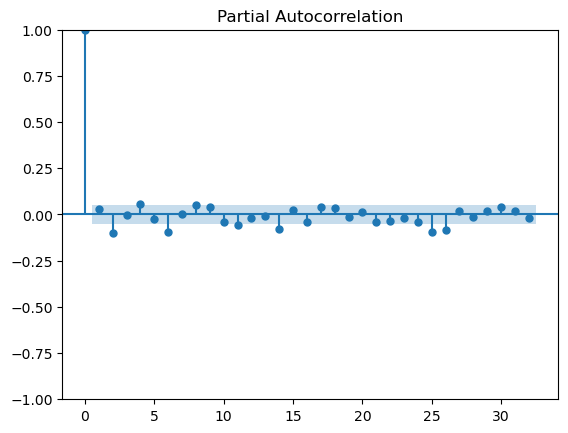

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf=plot_pacf(df['First Difference'].dropna())

In [18]:
#    P=2,4,6,8,11,14,25,26

# ACF

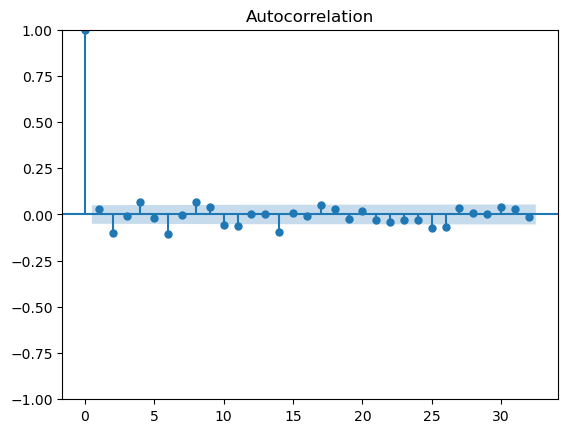

In [19]:
acf=plot_acf(df['First Difference'].dropna())

In [20]:
#    q=2,4,6,8,10,11,14,25,26

# AUTO ARIMA

In [21]:
from pmdarima import auto_arima
auto_arima((df['First Difference'].dropna()))

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

# ARIMA

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
ARIMA_model=ARIMA (df['First Difference'],order=(4,1,6))
ARIMA_model_fit=ARIMA_model.fit()

C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAI SAATHWIK DUSSA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

In [24]:
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       First Difference   No. Observations:                 1511
Model:                 ARIMA(4, 1, 6)   Log Likelihood               -3042.333
Date:                Thu, 27 Jul 2023   AIC                           6106.666
Time:                        00:11:45   BIC                           6165.184
Sample:                             0   HQIC                          6128.459
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6790      0.046    -36.622      0.000      -1.769      -1.589
ar.L2         -1.6749      0.077    -21.786      0.000      -1.826      -1.524
ar.L3         -1.4559      0.064    -22.777      0.0

In [25]:
results=ARIMA_model_fit.predict()

# plot

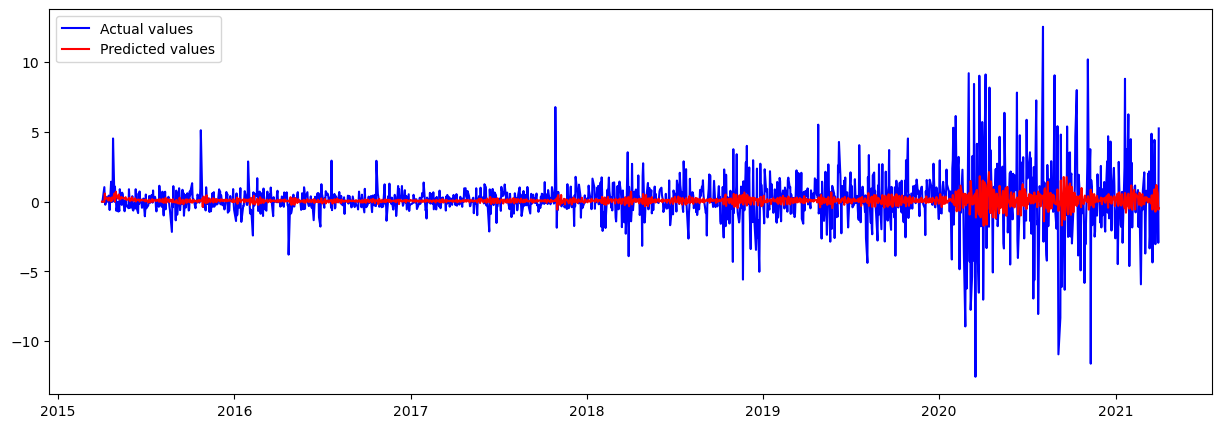

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df['First Difference'],color='blue',label='Actual values')
plt.plot(results,color='red',label='Predicted values')
plt.legend()
plt.show();

In [27]:
#Back to original scale

In [28]:
np.cumsum(df['First Difference'])

Date
2015-04-01 16:00:00       NaN
2015-04-02 16:00:00     -0.02
2015-04-06 16:00:00      1.02
2015-04-07 16:00:00      1.15
2015-04-08 16:00:00      0.93
                        ...  
2021-03-25 16:00:00    196.18
2021-03-26 16:00:00    195.95
2021-03-29 16:00:00    196.04
2021-03-30 16:00:00    193.09
2021-03-31 16:00:00    198.34
Name: First Difference, Length: 1511, dtype: float64

In [29]:
results.cumsum()

Date
2015-04-01 16:00:00      0.000000
2015-04-02 16:00:00      0.000000
2015-04-06 16:00:00     -0.020000
2015-04-07 16:00:00      0.561337
2015-04-08 16:00:00      0.831880
                          ...    
2021-03-25 16:00:00    121.717784
2021-03-26 16:00:00    122.906693
2021-03-29 16:00:00    123.507422
2021-03-30 16:00:00    122.932832
2021-03-31 16:00:00    122.462895
Name: predicted_mean, Length: 1511, dtype: float64

# Visualize

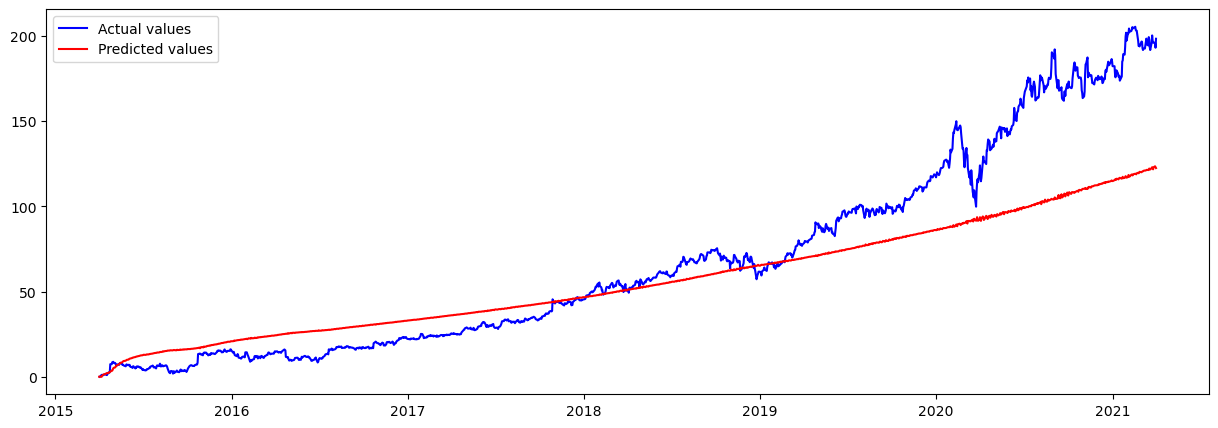

In [30]:
plt.figure(figsize=(15,5))
plt.plot((df['First Difference'].cumsum()),color='blue',label='Actual values')
plt.plot(results.cumsum(),color='red',label='Predicted values')
plt.legend()
plt.show();

# evaluation

In [31]:
import numpy as np
residuals=df['First Difference']-results
rmse=np.sqrt(np.mean(residuals**2))
print(rmse)

1.80389525161157


# We can try changing p and q values for better visualization and lower RMSE